# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
rides_per_type=pyber_data_df.groupby(["type"]).count()["ride_id"]
rides_per_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
drivers_by_type=city_data_df.groupby(["type"]).sum()["driver_count"]
drivers_by_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type
total_fares=pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 
avg_fare_by_type= total_fares / rides_per_type
avg_fare_by_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type. 
avg_fare_by_driver = total_fares / drivers_by_type
avg_fare_by_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_data_summary_df=pd.DataFrame({"Total Rides":rides_per_type, 
                   "Total Drivers": drivers_by_type,
                   "Total Fares": total_fares,
                   "Average Fare per Ride": avg_fare_by_type,
                   "Average Fare per Driver": avg_fare_by_driver})
pyber_data_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_data_summary_df.index.name = None
pyber_data_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [10]:
#  8. Format the columns.
pyber_data_summary_df["Total Rides"]=pyber_data_summary_df["Total Rides"].map("{:,}".format)
pyber_data_summary_df["Total Drivers"]=pyber_data_summary_df["Total Drivers"].map("{:,}".format)
pyber_data_summary_df["Total Fares"]=pyber_data_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_data_summary_df["Average Fare per Ride"]=pyber_data_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_data_summary_df["Average Fare per Driver"]=pyber_data_summary_df["Average Fare per Driver"].map("${:,.2f}".format)

pyber_data_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [12]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
total_fare_by_time=pyber_data_df.groupby(["type", "date"]).sum()['fare']
total_fare_by_time.head()

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
Name: fare, dtype: float64

In [13]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
total_fare_by_time=total_fare_by_time.reset_index()

In [14]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fares_pivot_table= pd.pivot_table(total_fare_by_time, index='date', columns='type')
fares_pivot_table.head(10)

fare                
type                 Rural Suburban  Urban
date                                      
2019-01-01 00:08:16    NaN      NaN  37.91
2019-01-01 00:46:46    NaN    47.74    NaN
2019-01-01 02:07:24    NaN    24.07    NaN
2019-01-01 03:46:50    NaN      NaN   7.57
2019-01-01 05:23:21    NaN      NaN  10.75
2019-01-01 09:45:36  43.69      NaN    NaN
2019-01-01 12:32:48    NaN    25.56    NaN
2019-01-01 14:40:14    NaN      NaN   5.42
2019-01-01 14:42:25    NaN      NaN  12.31
2019-01-01 14:52:06    NaN    31.15    NaN

In [15]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
pyber_data_df['date']=pd.to_datetime(pyber_data_df['date'])
pyber_data_Q1 = pyber_data_df.loc[(pyber_data_df["date"]<= "2019-04-28")]
pyber_data_Q1.dtypes

city                    object
date            datetime64[ns]
fare                   float64
ride_id                  int64
driver_count             int64
type                    object
dtype: object

In [16]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
pyber_data_Q1= pyber_data_Q1.set_index(['date'])
pyber_data_Q1 = pyber_data_Q1.sort_index()
pyber_data_Q1.head()

,city,fare,ride_id,driver_count,type
date,,,,,
2019-01-01 00:08:16,Liumouth,37.91,5673666505216,69,Urban
2019-01-01 00:46:46,Colemanland,47.74,2215912677020,23,Suburban
2019-01-01 02:07:24,Sotoville,24.07,7827431948090,10,Suburban
2019-01-01 03:46:50,Royland,7.57,5815378003370,64,Urban
2019-01-01 05:23:21,West Heidi,10.75,6571513080673,28,Urban


In [17]:
# 7. Check that the datatype for the index is datetime using df.info()
pyber_data_Q1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          2177 non-null   object 
 1   fare          2177 non-null   float64
 2   ride_id       2177 non-null   int64  
 3   driver_count  2177 non-null   int64  
 4   type          2177 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 102.0+ KB


In [18]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
pyber_weekly_Q1=pyber_data_Q1.groupby(['type']).resample('W').sum()
pyber_weekly_Q1.head()

fare         ride_id  driver_count
type  date                                            
Rural 2019-01-06  187.92  19483770872540            22
      2019-01-13   67.65  17881589293584            11
      2019-01-20  306.00  13328680707361            32
      2019-01-27  179.69  31365040155920            26
      2019-02-03  333.08  46946331148071            43

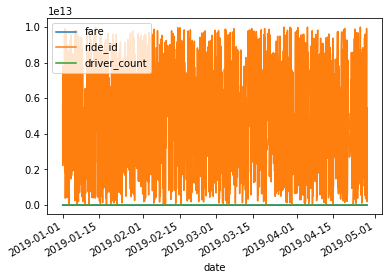

In [19]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
ax = pyber_data_Q1.plot(ylabel ='')
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

